In [ ]:
# install package
!pip install tensorflow
!pip install torch
!pip install torchvision
!pip install pillow

# **딥러닝 프레임워크 (Deep Learning Framework)**
**[ 7주차에 이어서 ]**

### **모델 가중치 확인**

#### **Tensorflow (Keras)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

In [ ]:
# 모델 생성 (예시는 Sequntial API 모델이지만 Functional API, Subclassing API 모델도 똑같이 가능)
model = Sequential([layers.Input(shape=(28,28), name="Input"),
                    layers.Flatten(name="Flatten"),
                    layers.Dense(5, activation='relu', name="Dense1"),
                    layers.Dense(5, activation='relu', name="Dense2"),
                    layers.Dense(1, activation='sigmoid', name="Output")])

In [ ]:
# 특정 레이어 가중치 확인
layer = model.get_layer("Dense2")  # model.layers[2]와 같은 결과
print(f"Dense2 Weights:\n{layer.get_weights()[0]}\n")
print(f"Dense2 bias:\n{layer.get_weights()[1]}")

Dense2 Weights:
[[-0.3361545  -0.6816075  -0.49579978  0.18425697 -0.1818549 ]
 [ 0.13900328 -0.22437572 -0.02935386 -0.31069824  0.06200075]
 [-0.6161269   0.6333586  -0.5215648  -0.5134951  -0.36727497]
 [ 0.35289204 -0.5259516  -0.51687783 -0.3853003   0.2929741 ]
 [ 0.69874656  0.63102543  0.25500166 -0.01300967 -0.2822905 ]]

Dense2 bias:
[0. 0. 0. 0. 0.]


#### **Pytorch**

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
class MyModel(nn.Module):

  def __init__(self, input_shape=(28,28)):
    super(MyModel, self).__init__()
    self.flatten_layer = nn.Flatten()
    self.dense1_layer = nn.Sequential(nn.Linear(input_shape[0]*input_shape[1],5), nn.ReLU())
    self.dense2_layer = nn.Sequential(nn.Linear(5,5), nn.ReLU())
    self.output_layer = nn.Sequential(nn.Linear(5,1))

  def forward(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

# 모델 생성
model = MyModel()

In [ ]:
# 모델 가중치 확인
print("Model's parameters:")
model.state_dict()                  # list(model.parameters())를 사용하면 value만 볼 수 있음

Model's parameters:


OrderedDict([('dense1_layer.0.weight',
              tensor([[ 0.0008, -0.0028, -0.0166,  ..., -0.0224, -0.0280, -0.0001],
                      [ 0.0319, -0.0132, -0.0144,  ...,  0.0163,  0.0084,  0.0078],
                      [ 0.0114, -0.0155, -0.0048,  ..., -0.0308,  0.0341, -0.0134],
                      [ 0.0081,  0.0089,  0.0265,  ..., -0.0008,  0.0001,  0.0227],
                      [-0.0243,  0.0284, -0.0119,  ..., -0.0139, -0.0216,  0.0231]])),
             ('dense1_layer.0.bias',
              tensor([ 0.0270,  0.0263,  0.0312, -0.0349, -0.0285])),
             ('dense2_layer.0.weight',
              tensor([[-0.2936,  0.3252, -0.1487,  0.2618,  0.1797],
                      [-0.3501,  0.4297, -0.2526,  0.1982, -0.1842],
                      [ 0.2105, -0.1438, -0.1903, -0.2209,  0.3249],
                      [ 0.3688,  0.0186,  0.3660,  0.4415, -0.0809],
                      [ 0.1329,  0.2266, -0.0225,  0.2993,  0.4307]])),
             ('dense2_layer.0.bias',
       

### **모델 저장과 복원**

In [ ]:
# 모델 저장을 위한 디렉토리 생성
import os

if not os.path.exists("tf_model/"):
  os.makedirs("tf_model/")
if not os.path.exists("th_model/"):
  os.makedirs("th_model/")

#### **Tensorflow (Keras)**


- 모델 전체 (구조, 가중치, 컴파일 정보, 옵티마이저와 그 상태) 저장 및 불러오기
    - `model.save(file_path)`: 모델 전체 저장하기
    - `tf.keras.models.load_model(file_path)`: 모델 전체 불러오기
    - `SavedModel` 또는 `HDF5` 파일 형식 사용

- 모델 가중치 저장 및 불러오기
    - `model.save_weights(file_path)`: 모델 가중치 저장하기
    - `model.load_weights(file_path)`: 모델 가중치 불러오기 (단, 모델 구조가 일치해야 함)
    - `.ckpt` 확장자가 있는 Tensorflow Checkpoint 형식 사용

- 모델 구조 저장 및 불러오기
    - `model.to_json()`: 모델 구조를 json 파일 형식으로 저장할 때 사용
    - `tf.keras.models.model_from_json(file_path)`: json 파일로부터 모델 구조 불러오기

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
# MNIST 데이터셋 불러오기
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 훈련 데이터의 30%를 검증 데이터로 사용
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# 데이터 전처리
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


**Sequential API &#160; & &#160; Functional API**

In [ ]:
# 모델 생성 (예시는 Squential API 이지만 Functional API도 가능함)
model = Sequential([layers.Input(shape=(28,28), name="Input"),
                    layers.Flatten(name="Flatten"),
                    layers.Dense(100, activation='relu', name="Dense1"),
                    layers.Dense(100, activation='relu', name="Dense2"),
                    layers.Dense(10, activation='softmax', name="Output")])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 1.5412 - accuracy: 0.6061 - val_loss: 0.8595 - val_accuracy: 0.8018
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.6533 - accuracy: 0.8426 - val_loss: 0.5249 - val_accuracy: 0.8625
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.4690 - accuracy: 0.8764 - val_loss: 0.4248 - val_accuracy: 0.8839
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3995 - accuracy: 0.8912 - val_loss: 0.3776 - val_accuracy: 0.8948
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3616 - accuracy: 0.8998 - val_loss: 0.3515 - val_accuracy: 0.8999
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3366 - accuracy: 0.9057 - val_loss: 0.3346 - val_accuracy: 0.9057
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3177 - accuracy: 0.9105 - val_loss: 0.3103 - val_accuracy: 0.9114
Epoch 

In [ ]:
# 모델 평가
_ , accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9249
Accuracy: 0.9248999953269958


In [ ]:
# 모델 전체 저장
model.save("tf_model/model_seq")          # SavedModel 파일 형식
model.save("tf_model/model_seq.h5")       # HDF5 파일 형식

# 모델 가중치 저장
model.save_weights("tf_model/model_seq_weights")

# 모델 구조 저장
model_json = model.to_json()              # json 형식
with open('tf_model/model_seq.json', 'w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 모델 불러오기 및 불러온 모델 평가 (1)
print("=== load_model() 이용 ===")
loaded_model = tf.keras.models.load_model("tf_model/model_seq")     # HDF5 파일("model_seq.h5")을 사용해도 동일한 결과를 얻을 수 있음
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_model() 이용 ===
313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9249
Loaded Model Accuracy: 0.9248999953269958


In [ ]:
# 모델 불러오기 및 불러온 모델 평가 (2)
print("=== load_weights() 이용 ===")
loaded_model = Sequential([layers.Input(shape=(28,28), name="Input"),
                           layers.Flatten(name="Flatten"),
                           layers.Dense(100, activation='relu', name="Dense1"),
                           layers.Dense(100, activation='relu', name="Dense2"),
                           layers.Dense(10, activation='softmax', name="Output")])    # 모델 생성 (구조)
loaded_model.load_weights("tf_model/model_seq_weights")                               # 모델 가중치 불러오기
loaded_model.compile(loss='sparse_categorical_crossentropy',     # load_weights() 함수는 컴파일 정보를 불러오지 않기 때문에,
                     optimizer='sgd',                            # evaluate() 함수를 사용하려면 모델을 새롭게 컴파일 해줘야 함
                     metrics=['accuracy'])                       # predict() 함수는 컴파일 없이 사용 가능
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_weights() 이용 ===
313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9249
Loaded Model Accuracy: 0.9248999953269958


In [ ]:
# 모델 불러오기 및 불러온 모델 평가 (3)
print("=== load_weights(), model_from_json() 이용 ===")
f = open("tf_model/model_seq.json", "r")
model_json = f.read()
f.close()
loaded_model = tf.keras.models.model_from_json(model_json)            # 모델 생성 (구조)
loaded_model.load_weights("tf_model/model_seq_weights")               # 모델 가중치 불러오기
loaded_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_weights(), model_from_json() 이용 ===
313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9249
Loaded Model Accuracy: 0.9248999953269958


**Subclassing API**

In [ ]:
class MyModel(Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten_layer = layers.Flatten(name="Flatten")
    self.dense1_layer = layers.Dense(100, activation="relu", name="Dense1")
    self.dense2_layer = layers.Dense(100, activation="relu", name="Dense2")
    self.output_layer = layers.Dense(10, activation="softmax", name="Output")

  def build(self, input_shape):
    super(MyModel, self).build(input_shape)

  def call(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

In [ ]:
# 모델 생성
model = MyModel()
model.build(input_shape=(None,28,28))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
329/329 [==============================] - 3s 6ms/step - loss: 1.6460 - accuracy: 0.5621 - val_loss: 0.9622 - val_accuracy: 0.7849
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.6980 - accuracy: 0.8310 - val_loss: 0.5412 - val_accuracy: 0.8607
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.4752 - accuracy: 0.8742 - val_loss: 0.4269 - val_accuracy: 0.8848
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3995 - accuracy: 0.8914 - val_loss: 0.3769 - val_accuracy: 0.8949
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3608 - accuracy: 0.8991 - val_loss: 0.3484 - val_accuracy: 0.9012
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3358 - accuracy: 0.9045 - val_loss: 0.3263 - val_accuracy: 0.9075
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3169 - accuracy: 0.9095 - val_loss: 0.3207 - val_accuracy: 0.9065
Epoch 

In [ ]:
# 모델 평가
_ , accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9224
Accuracy: 0.9223999977111816


In [ ]:
# 모델 전체 저장
model.save("tf_model/model_sub")       # SavedModel 파일 형식

# 모델 가중치 저장
model.save_weights("tf_model/model_sub_weights")

In [ ]:
# 모델 불러오기 및 불러온 모델 평가 (1)
print("=== load_model() 이용 ===")
loaded_model = tf.keras.models.load_model("tf_model/model_sub")      # 모델 전체 불러오기
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_model() 이용 ===
313/313 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9224
Loaded Model Accuracy: 0.9223999977111816


In [ ]:
# 모델 불러오기 및 불러온 모델 평가 (2)
print("=== load_weights() 이용 ===")
loaded_model = MyModel()                                             # 모델 생성 (구조)
loaded_model.build(input_shape=(None,28,28))                         # 모델 가중치 초기화
loaded_model.load_weights("tf_model/model_sub_weights")              # 모델 가중치 불러오기
loaded_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])
print(f"Loaded Model Accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

=== load_weights() 이용 ===
313/313 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9224
Loaded Model Accuracy: 0.9223999977111816


#### **PyTorch**

- `.pt` 또는 `.pth` 확장자를 사용하여 저장

- 모델 전체(구조, 가중치) 저장 및 불러오기
    - `th.save(model, file_path)`: 모델 전체 저장하기
    - `th.load(file_path)`: 모델 전체 불러오기

- 모델의 가중치 저장 및 불러오기
    - `th.save(model.state_dict(), file_path)`: 모델 가중치 저장하기
    - `model.load_state_dict(th.load(file_path))`: 모델 가중치 불러오기




In [ ]:
import numpy as np
import torch as th
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
# MNIST 데이터셋 불러오기
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 훈련 데이터의 30%를 검증 데이터로 사용
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# 데이터 전처리
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Dataloader 생성
train_dataset = TensorDataset(th.from_numpy(X_train), th.from_numpy(y_train))
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataset = TensorDataset(th.from_numpy(X_val), th.from_numpy(y_val))
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)

In [ ]:
class MyModel(nn.Module):

  def __init__(self, input_shape=(28,28)):
    super(MyModel, self).__init__()
    self.flatten_layer = nn.Flatten()
    self.dense1_layer = nn.Sequential(nn.Linear(input_shape[0]*input_shape[1],100), nn.ReLU())
    self.dense2_layer = nn.Sequential(nn.Linear(100,100), nn.ReLU())
    self.output_layer = nn.Sequential(nn.Linear(100,10))

  def forward(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

# 모델 생성
model = MyModel()

# 손실 함수, 옵티마이저 설정
loss = nn.CrossEntropyLoss()
optimizer = th.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
# 모델 훈련
epochs = 10

for i in range(epochs):

  train_losses_iter, val_losses_iter = [], []

  for X, y in train_dataloader:

    model.train()
    y_pred = model(X)
    train_loss = loss(y_pred, y)
    train_losses_iter.append(train_loss.item())

    train_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  for X, y in val_dataloader:

    model.eval()
    with th.no_grad():
      y_pred = model(X)
      val_loss = loss(y_pred, y)
      val_losses_iter.append(val_loss.item())

  train_loss_epoch = np.array(train_losses_iter).mean()
  val_loss_epoch = np.array(val_losses_iter).mean()

  print(f"Epoch {i+1}/{epochs}   train_loss: {round(train_loss_epoch, 4)}   val_loss: {round(val_loss_epoch, 4)}\n")

Epoch 1/10   train_loss: 1.1541   val_loss: 0.4792

Epoch 2/10   train_loss: 0.3873   val_loss: 0.3908

Epoch 3/10   train_loss: 0.3202   val_loss: 0.4761

Epoch 4/10   train_loss: 0.2802   val_loss: 0.2937

Epoch 5/10   train_loss: 0.2497   val_loss: 0.2662

Epoch 6/10   train_loss: 0.224   val_loss: 0.2408

Epoch 7/10   train_loss: 0.2033   val_loss: 0.2017

Epoch 8/10   train_loss: 0.1852   val_loss: 0.1952

Epoch 9/10   train_loss: 0.1703   val_loss: 0.1838

Epoch 10/10   train_loss: 0.1565   val_loss: 0.1669



In [ ]:
# 모델 평가
test_dataset = TensorDataset(th.from_numpy(X_test), th.from_numpy(y_test))
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

model.eval()
with th.no_grad():
  correct = 0
  for X, y in test_dataloader:
    correct += (y == th.argmax(model(X), dim=1)).sum()
accuracy = correct / len(test_dataset)

print(f"Accuracy: {accuracy}")

Accuracy: 0.953000009059906


In [ ]:
# 모델 저장
th.save(model, "th_model/model_th.pth")                           # 모델 전체 저장 (.pt 확장자도 사용 가능)
th.save(model.state_dict(), "th_model/model_state_dict.pth")      # 모델 가중치 저장 (.pt 확장자도 사용 가능)

In [ ]:
# 모델 불러오기 및 불러온 모델 평가 (1)
loaded_model = th.load("th_model/model_th.pth")    # 모델 전체 불러오기 (단, MyModel 클래스가 모델을 저장할 때와 같게 정의되어 있어야 함)
loaded_model.eval()
with th.no_grad():
  correct = 0
  for X, y in test_dataloader:
    correct += (y == th.argmax(loaded_model(X), dim=1)).sum()
accuracy = correct / len(test_dataset)
print(f"Loaded Model Accuracy: {accuracy}")

Loaded Model Accuracy: 0.953000009059906


In [ ]:
# 모델 불러오기 및 불러온 모델 평가 (2)
loaded_model = MyModel()                                                  # 모델 생성(구조)
loaded_model.load_state_dict(th.load("th_model/model_state_dict.pth"))    # 모델 가중치 불러오기
loaded_model.eval()
with th.no_grad():
  correct = 0
  for X, y in test_dataloader:
    correct += (y == th.argmax(nn.Softmax(dim=1)(loaded_model(X)), dim=1)).sum()
accuracy = correct / len(test_dataset)
print(f"Loaded Model Accuracy: {accuracy}")

Loaded Model Accuracy: 0.953000009059906


### **콜백 (Callback)**

- 모델을 훈련시키는 동안 어떤 이벤트가 발생하면 개발자가 원하는 동작을 수행할 수 있게 함
- Tensorflow (Keras)에서 `fit()` 함수의 callbacks 인자에 객체 리스트를 지정하여 사용 (한 번에 여러 종류 사용 가능)
- Pytorch에서는 콜백 모듈이 없어 직접 구현해서 사용해야 함

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
# MNIST 데이터셋 불러오기
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 훈련 데이터의 30%를 검증 데이터로 사용
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# 데이터 전처리
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
class MyModel(Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten_layer = layers.Flatten(name="Flatten")
    self.dense1_layer = layers.Dense(100, activation="relu", name="Dense1")
    self.dense2_layer = layers.Dense(100, activation="relu", name="Dense2")
    self.output_layer = layers.Dense(10, activation="softmax", name="Output")

  def build(self, input_shape):
    super(MyModel, self).build(input_shape)

  def call(self, x):
    x = self.flatten_layer(x)
    x = self.dense1_layer(x)
    x = self.dense2_layer(x)
    x = self.output_layer(x)
    return x

#### **EarlyStopping**

- 모델 성능이 일정 `patience` 수 동안 개선되지 않을 때 훈련 중단
- 모델이 향상되지 않으면 훈련이 자동으로 중지되므로, `epochs` 숫자를 크게 해도 무방
- 훈련이 중단된 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요 없음

In [ ]:
# EarlyStopping 객체 생성
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss",           # 모니터링할 지표
                               patience=3,                   # patience 수 동안 모니터링하는 지표가 좋아지지 않으면 훈련 중단
                               verbose=1,                    # 1: 결과 출력 / 0: 결과 출력 X
                               restore_best_weights=True)    # True: 훈련이 중단되고 모니터링하는 지표가 가장 좋았을 떄의 모델 가중치 복원 /
                                                             # False: 훈련이 중단된 후의 모델의 가중치 그대로 적용

In [ ]:
# 모델 생성
model = MyModel()
model.build(input_shape=(None,28,28))

# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 훈련
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val),
          verbose=1, callbacks=[early_stopping])

Epoch 1/15
329/329 [==============================] - 3s 6ms/step - loss: 0.4005 - accuracy: 0.8866 - val_loss: 0.2234 - val_accuracy: 0.9336
Epoch 2/15
329/329 [==============================] - 2s 6ms/step - loss: 0.1663 - accuracy: 0.9516 - val_loss: 0.1493 - val_accuracy: 0.9569
Epoch 3/15
329/329 [==============================] - 3s 8ms/step - loss: 0.1163 - accuracy: 0.9657 - val_loss: 0.1221 - val_accuracy: 0.9625
Epoch 4/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.1061 - val_accuracy: 0.9690
Epoch 5/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9797 - val_loss: 0.0995 - val_accuracy: 0.9700
Epoch 6/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9841 - val_loss: 0.0958 - val_accuracy: 0.9714
Epoch 7/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.1011 - val_accuracy: 0.9703
Epoch 

#### **ModelCheckPoint**

- 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용
- 훈련 중 가장 성능이 좋은 모델 자동으로 저장 가능

In [ ]:
# 체크포인트를 저장할 디렉토리 생성
import os

if not os.path.exists("checkpoints/"):
  os.makedirs("checkpoints/")

In [ ]:
# ModelCheckPoint 객체 생성
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = "checkpoints/checkpoint{epoch}"             # 저장될 파일 위치, {epoch}이나 {val_loss}를 통해 checkpoint별 저장
checkpoint = ModelCheckpoint(filepath=file_path,        # {epoch}이나 {val_loss}를 붙이지 않으면 checkpoint가 계속 덮어씌워짐
                             mointor="val_loss",        # 모니터링할 지표
                             save_best_only=True,       # True: 모니터링할 지표가 좋아지면 저장 / False: 항상 저장
                             save_weights_only=True,    # True: 모델 가중치만 저장 / False: 모델 전체 저장
                             save_freq="epoch",         # "epoch": 매 epoch 마다 저장 / 숫자 넣으면 그 숫자 간격으로 저장
                             verbose=1)                 # 1: 결과 출력 / 0: 결과 출력 X

In [ ]:
# 모델 생성
model = MyModel()
model.build(input_shape=(None,28,28))

# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 훈련
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val),
          verbose=1, callbacks=[checkpoint])

Epoch 1/15
318/329 [===========================>..] - ETA: 0s - loss: 0.4074 - accuracy: 0.8881
Epoch 1: val_loss improved from inf to 0.20837, saving model to checkpoints/checkpoint1
329/329 [==============================] - 2s 6ms/step - loss: 0.4017 - accuracy: 0.8898 - val_loss: 0.2084 - val_accuracy: 0.9398
Epoch 2/15
318/329 [===========================>..] - ETA: 0s - loss: 0.1688 - accuracy: 0.9517
Epoch 2: val_loss improved from 0.20837 to 0.14806, saving model to checkpoints/checkpoint2
329/329 [==============================] - 2s 5ms/step - loss: 0.1676 - accuracy: 0.9520 - val_loss: 0.1481 - val_accuracy: 0.9574
Epoch 3/15
325/329 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9650
Epoch 3: val_loss improved from 0.14806 to 0.13103, saving model to checkpoints/checkpoint3
329/329 [==============================] - 2s 5ms/step - loss: 0.1184 - accuracy: 0.9649 - val_loss: 0.1310 - val_accuracy: 0.9617
Epoch 4/15
326/329 [===========================

#### **LearningRateScheduler**

  - 모델을 훈련시키는 동안 학습률(Learning Rate)를 동적으로 변경할 때 사용
  - Pytorch에서는 `th.optim.lr_schduler`를 사용하여 훈련 중에 학습률을 변경시킬 수 있음

**Tensorflow (Keras)**

In [ ]:
# LearningRateSheduler 객체 생성
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate                            # epoch이 10미만이면 학습률 그대로 사용
  else:
    return learning_rate * tf.math.exp(-0.1)        # epoch이 10이상이면 학습률을 이전 학습률의 exp(-0.1)로 변경하여 사용

lr_scheduler = LearningRateScheduler(scheduler)     # epoch과 학습률을 input으로 받고 학습률을 output으로 리턴해주는 함수를 인자로 받음

In [ ]:
# 모델 생성
model = MyModel()
model.build(input_shape=(None,28,28))

# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 훈련
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val),
          verbose=1, callbacks=[lr_scheduler])

Epoch 1/15
329/329 [==============================] - 3s 6ms/step - loss: 0.4132 - accuracy: 0.8851 - val_loss: 0.2111 - val_accuracy: 0.9386 - lr: 0.0010
Epoch 2/15
329/329 [==============================] - 2s 5ms/step - loss: 0.1693 - accuracy: 0.9502 - val_loss: 0.1477 - val_accuracy: 0.9565 - lr: 0.0010
Epoch 3/15
329/329 [==============================] - 2s 5ms/step - loss: 0.1186 - accuracy: 0.9655 - val_loss: 0.1348 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 4/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0904 - accuracy: 0.9734 - val_loss: 0.1099 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 5/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0720 - accuracy: 0.9786 - val_loss: 0.1057 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 6/15
329/329 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.1002 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 7/15
329/329 [==============================] - 2s 8ms/step - lo

**Pytorch**

In [ ]:
# LambdaLR Learning Rate Scheduler 생성
import torch as th
from torch.optim.lr_scheduler import LambdaLR    # LambdaLR 말고도 다양한 Learning Rate Scheduler가 있음 (인자도 각각 다름)

def scheduler(epoch):
  if epoch < 5:                 # epoch이 5 미만이면, (학습률 = 1*초기 학습률)
    return 1
  else:                         # epoch이 5 이상이면, (학습률 = 0.5*초기 학습률)
    return 0.5

params = th.randn(2,5)
optimizer = th.optim.Adam(list(params), lr=0.001)     # list(params): 모델의 파라미터라고 가정
lr_scheduler = LambdaLR(optimizer, scheduler)         # epoch을 input으로 받고 초기 학습률에 곱할 lambda를 output으로 리턴해주는 함수를 인자로 받음

In [ ]:
# Learning Rate Scheduler 사용법
epochs = 10
for i in range(epochs):
  """
  for X, y in dataloader:
    loss =
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  """
  print(f"Epoch{i+1} Learning Rate: {optimizer.param_groups[0]['lr']}")
  lr_scheduler.step()    # 한 epoch이 끝나는 지점에 코드 작성

Epoch1 Learning Rate: 0.001
Epoch2 Learning Rate: 0.001
Epoch3 Learning Rate: 0.001
Epoch4 Learning Rate: 0.001
Epoch5 Learning Rate: 0.001
Epoch6 Learning Rate: 0.0005
Epoch7 Learning Rate: 0.0005
Epoch8 Learning Rate: 0.0005
Epoch9 Learning Rate: 0.0005
Epoch10 Learning Rate: 0.0005


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


### **모델 훈련 기술**

**과적합 (Overfitting) & 과소적합 (Underfitting)**

- 과적합 (Overfitting)
    - 모델이 훈련 데이터에 지나치게 맞추어진 상태로, 새로운 데이터에서는 좋은 성능을 보이지 않음
    - 훈련 데이터가 적은 경우, 모델이 지나치게 복잡한 경우, 훈련 횟수가 많은 경우 등에서 발생
- 과소적합 (Underfitting)
    - 모델이 훈련 데이터를 충분히 학습하지 못해 성능이 안좋은 현상
    - 모델이 지나치게 단순한 경우, 훈련 횟수가 적은 경우 등에서 발생

<br />
<img src="https://velog.velcdn.com/images%2Fjoo4438%2Fpost%2Fc759a5f6-d3c5-4c33-ade9-78c4cfec4b85%2Fimage.png" width="600">

- 모델의 과적합과 과소적합을 막기 위한 다양한 방법들 존재
    - 모델 크기 조절
    - 규제 (Regularization)
    - 드롭아웃 (Dropout)
    - 배치 정규화 (BatchNormalization)
    - 데이터 증강 (Data Augmentation)

**기울기 소실 (Gradient Vanishing) & 기울기 폭주 (Gradient Exploding)**

- 기울기 소실 (Gradient Vanishing)
    - 역전파 과정에서 입력층으로 갈수록 기울기가 점차 작아지는 현상
    - 입력층에 가까운 층들의 가중치가 업데이트가 제대로 되지 않음

- 기울기 폭주 (Gradient Exploding)
    - 기울기 소실과 반대의 경우로, 역전파 과정에서 입력층으로 갈수록 기울기 점차 커지는 현상
    - 가중치들이 비정상적으로 큰 값이 되어 발산함

- 기울기 소실 문제와 기울기 폭주 문제를 막기 위한 다양한 방법들 존재
    - 수렴하지 않는 활성화함수 사용 (ReLU 등)
    - 그래디언트 클리핑 (Gradient Clipping)
    - 배치 정규화 (Batch Normalization)
    - 가중치 초기화 (Weight Initialization)

#### **모델 크기 조절**

- 모델 크기 감소: 모델의 파라미터 수를 감소시켜 과적합 방지
    - 은닉층 개수 감소
    - 은닉층 노드 개수 감소
- 모델 크기 증가: 모델의 파라미터 수를 증가시켜 과소적합 방지
    - 은닉층 개수 증가
    - 은닉층 노드 개수 증가
    
<br />
<img src="https://i.ibb.co/XFV7mhF/2024-01-06-6-26-09.png" width="550">

#### **규제 (Regularization)**

- 모델의 가중치 값이 커지면 과적합될 가능성이 높아짐
- Loss에 모델의 가중치 합을 페널티 텀으로 줌으로써 과적합 방지

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

**L1 규제 (L1 Regularization)**

- Loss에 모델의 가중치 절대값 합을 페널티 텀으로 주는 방법

- $Loss = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}\sum|w|}$ <br> $L$ : Loss Function

In [ ]:
print("=== Tensorflow (Keras) ===")
l1_regularizer = tf.keras.regularizers.L1(l1=0.01)                 # 0.01: lambda 값
tf_dense = layers.Dense(5, kernel_regularizer=l1_regularizer)      # 레이어를 만들 때, kernel_regularizer 인자에 객체를 넣어 사용
print(l1_regularizer)                                              # kernel_regularizer 인자에 "l1"을 넣어 간단하게도 사용 가능 (lambda 기본값: 0.01)
print(f"Lambda: {l1_regularizer.l1}")

print("\n=== Pytorch ===")
# loss에 직접 모델 가중치의 절대값 합을 더하는 방식으로 사용
""" == 예시 ==
weights = []
for name, param in model.named_parameters():
    if "weight" in name:
        weights.append(th.norm(param, p=1))
weight_sum = sum(weights)                                           # 모델 가중치의 절대값 합
loss = nn.CrossEntropyLoss()(th_dense(X),y) + 0.01 * weight_sum     # 0.01: lambda 값
"""
print("예시 확인")

=== Tensorflow (Keras) ===
Lambda: 0.009999999776482582

=== Pytorch ===
예시 확인


**L2 규제 (L2 Regularization)**

- Loss에 모델의 가중치 제곱합을 페널티 텀으로 주는 방법
- 가중치 감쇠 (Weight Decay)라고도 부름

- $Loss = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}\sum w^2}$ <br> $L$ : Loss Function

In [ ]:
print("=== Tensorflow (Keras) ===")
l2_regularizer = tf.keras.regularizers.L2(l2=0.01)                 # 0.01: lambda 값
tf_dense = layers.Dense(5, kernel_regularizer=l2_regularizer)      # 레이어를 만들 때, kernel_regularizer 인자에 객체를 넣어 사용
print(l2_regularizer)                                              # kernel_regularizer 인자에 "l2"를 넣어 간단하게도 사용 가능 (lambda 기본값: 0.01)
print(f"Lambda: {l2_regularizer.l2}")

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,3)

# (1) 옵티마이저 객체의 weight_decay 인자에 lambda 값을 넣어 사용 가능
th_optim = th.optim.SGD(th_dense.parameters(), lr=0.001, weight_decay=0.01)
print(f"(1) Lambda: {th_optim.param_groups[0]['weight_decay']}")

# (2) loss에 직접 모델 가중치의 제곱합을 더하는 방식으로도 사용 가능
""" == 예시 ==
weights = []
for name, param in model.named_parameters():
    if "weight" in name:
        weights.append(th.norm(param, p=2))
weight_sum = sum(weights)                                           # 모델 가중치의 제곱합
loss = nn.CrossEntropyLoss()(th_dense(X),y) + 0.01 * weight_sum     # 0.01: lambda 값
"""
print("(2) 예시 확인")

=== Tensorflow (Keras) ===
Lambda: 0.009999999776482582

=== Pytorch ===
(1) Lambda: 0.01
(2) 예시 확인


**L1 규제와 L2 규제 비교**

- L1 규제
    - 𝛌값이 클수록 규제의 정도가 강해짐
    - 특정 가중치를 0으로 만들 수 있어 중요한 특성을 선택하는 효과가 있음
    - 0으로 된 가중치를 삭제해 모델의 복잡도를 낮출 수 있음
- L2 규제
    - 𝛌값이 클수록 규제의 정도가 강해짐
    - 특정 가중치를 0으로 만들 수 없음
    - 모델의 모든 가중치를 균등하고 작게 유지하려고 함
    - 일반적으로 L1 규제보다 좋은 결과를 얻을 수 있음

<br />
<img src="https://t1.daumcdn.net/cfile/tistory/99BED3425CE4B13418" width="550">

#### **그래디언트 클리핑 (Gradient Clipping)**

- 역전파 상황에서 기울기의 크기가 일정 임계값을 넘어가면 기울기 값을 자르는 방법
- 기울기의 크기는 기본적으로 L2 Norm 사용

- $ \frac{\partial ϵ}{\partial θ} = \begin{cases}
  \frac{threshold}{\vert\vert \hat{g} \vert\vert} \hat{g} \;\;\;\;
  if \; \vert\vert \hat{g} \vert\vert \geq threshold \\
  \;\;\;\;\; \hat{g}  \;\;\;\;\;\;\;\;\; otherwise \end{cases}
  \;\;\;\;\;$ Where $ \; \hat{g} = \frac{\partial ϵ}{\partial θ} $  

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
import torch as th
import torch.nn as nn

In [ ]:
print("=== Tensorflow (Keras) ===")
tf_optim = optimizers.SGD(clipvalue=2.0)                    # 옵티마이저 객체의 clipvalue 인자에 임계값을 넣어 사용 (잘랐을 때, 기울기 벡터의 방향이 바뀜)
print(f"Gradient Threshold: {tf_optim.clipvalue}")          # clipnorm 인자를 사용하면 벡터의 방향이 바뀌지 않게 기울기를 자름

print("\n=== Pytorch ===")
# 훈련 과정에서 optimzer.step() 전에,
# nn.utils.clip_grad(model.parameters(), max_norm) 코드를 작성하여 사용, max_norm: 임계값
""" == 예시 ==
for i in range(epochs):

  for X, y in dataloader:

    loss.backward()
    nn.utils.clip_grad(model.parameters(), max_norm)
    optimizer.step()
    optimizer.zero_grad()
"""
print("예시 확인")

=== Tensorflow (Keras) ===
Gradient Threshold: 2.0

=== Pytorch ===
예시 확인


#### **가중치 초기화 (Weight Initialization)**

- 같은 모델이라도 초기 가중치 설정에 따라 훈련시켰을 때 모델의 성능이 달라짐
- 초기 가중치를 잘 설정하면 기울기 소실, 폭주 문제를 해결해 줄 수 있음
- 각 층의 활성화 값들을 광범위하게 분포시키도록 가중치를 초기화해야 함
- 일반적으로, Xavier Initialization (=Glorot Initialization) 또는 He Initialization (=Kaiming Initialization) 사용

<br />
<img src="https://miro.medium.com/max/1225/1*t4aYsxpCqz2eymJ4zkUS9Q.png" width="550">

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

**Xavier Initialization (Glorot Initialization)**

- 이전 층의 노드 수가 $n_{in}$ 이고 다음 층의 노드 수가 $n_{out}$ 일 때, 표준편차가 $ \sqrt{\frac {2} {n_{in}+n_{out}}}$ 인 분포로 가중치 초기화
- 입력값과 출력값의 분산을 같게 만들어줌
- 활성화 함수가 선형 함수인 것을 전제로 함
    - 시그모이드 함수와 tanh 함수일 때 사용 (함수의 중간 부분이 선형성을 띄어 잘 작동하기 때문)
    - ReLU 함수의 경우는 활성화 값이 0으로 치우치는 결과를 얻음
- Uniform 분포를 사용한 초기화 방법과 Normal 분포를 사용한 초기화 방법이 있음

In [ ]:
print("===== Xavier Uniform Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="tanh", kernel_initializer="glorot_uniform")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.xavier_uniform_(th_dense.weight)

===== Xavier Uniform Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[-0.3697,  0.0365,  0.5372, -0.6483, -0.4268],
        [-0.2270,  0.0562,  0.2436, -0.5070,  0.1729],
        [-0.0793, -0.2176, -0.5513, -0.6904,  0.7030],
        [-0.5612, -0.4607,  0.1225, -0.5247,  0.6428],
        [ 0.5845,  0.6011, -0.5937,  0.5765, -0.1761]], requires_grad=True)

In [ ]:
print("===== Xavier Normal Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="tanh", kernel_initializer="glorot_normal")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.xavier_normal_(th_dense.weight)

===== Xavier Normal Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[ 0.1164, -0.0972,  0.5423,  0.0429,  0.0636],
        [-0.6770, -1.0027, -0.2630, -0.3419, -0.3452],
        [-0.4896,  0.2667,  0.5801,  0.2575, -0.0451],
        [ 0.3667,  0.0270, -0.9566, -0.0351,  0.2288],
        [-0.6982, -0.4641, -0.3457,  0.4327, -0.1277]], requires_grad=True)

**He Initialization (Kaiming Initialization)**

- ReLU 함수를 위해 만들어진 가중치 초기화 방법
- 이전 층의 노드 수가 $n_{in}$ 일 때, 표준편차가 $ \sqrt{\frac {2}{n_{in}} }$ 인 분포로 가중치 초기화
- 입력값과 출력값의 분산을 같게 만들어줌
    - ReLU 함수의 특성상 절반 정도의 활성화 값은 사라지기 때문에, 출력값의 분산이 다른 활성화 함수를 사용했을 때보다 2배 감소함
    - 따라서, Xavier Initialization 분산에 2배를 곱해줌으로써 대략적으로 입력값과 출력값의 분산을 같게 만들어 줄 수 있음
- Uniform 분포를 사용한 초기화 방법과 Normal 분포를 사용한 초기화 방법이 있음

In [ ]:
print("===== He Uniform Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="relu", kernel_initializer="he_uniform")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.kaiming_uniform_(th_dense.weight)

===== He Uniform Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[-0.9445,  1.0335,  0.6210,  0.3378,  0.1561],
        [-0.9204,  0.0266, -0.5238, -0.0777, -0.0471],
        [-0.4978,  0.3576,  0.8879, -0.0428,  0.1212],
        [ 0.1345, -0.5034,  0.3906,  0.0940,  0.1858],
        [ 0.4681,  0.7377, -0.0608,  0.8650,  0.0592]], requires_grad=True)

In [ ]:
print("===== He Normal Initialization =====")

print("\n=== Tensorflow (Keras) ===")
tf_dense = layers.Dense(5, activation="relu", kernel_initializer="he_normal")
print(tf_dense.kernel_initializer)

print("\n=== Pytorch ===")
th_dense = nn.Linear(5,5)
nn.init.kaiming_normal_(th_dense.weight)

===== He Normal Initialization =====

=== Tensorflow (Keras) ===

=== Pytorch ===


Parameter containing:
tensor([[ 0.8104, -0.7629, -0.4717, -0.1561,  0.5678],
        [-0.3730,  0.7730,  0.6555, -0.2042,  0.3590],
        [ 0.6224,  0.1624, -1.1266, -0.2399,  0.0728],
        [ 0.9397, -0.2359,  0.8010,  0.2105, -0.6533],
        [ 0.0263,  0.6784,  1.0296,  2.3663, -0.2895]], requires_grad=True)

#### **드롭아웃 (Dropout)**

- 모델 훈련 중 일부 노드의 출력값을 랜덤하게 0으로 변경
- 입력층과 은닉층에서 사용 가능하며 활성화 함수 뒤에 사용
- 드롭아웃 확률로 은닉층에서는 일반적으로 0.5를 사용
- 모델의 다양한 Submodel들을 훈련시키는 것과 같기 때문에, 모델 앙상블과 비슷한 효과를 가짐 (과적합 방지)

<br />
<img src="https://miro.medium.com/max/981/1*EinUlWw1n8vbcLyT0zx4gw.png" width="550">

- 훈련 과정과 테스트 과정에서 다르게 작동함
    - 테스트 과정에서는 모든 노드들이 드롭아웃되지 않고 사용됨
    - [ 테스트 과정에서 출력값 = 훈련 과정에서 출력값의 기대값 (드롭아웃 확률*출력값) ] 이어야 하기 때문에, <br>훈련 과정이나 테스트 과정 둘 중 하나에서 출력값을 스케일링 해줘야 함
- Vanilla Dropout
    - 훈련 중에 드롭아웃만 적용하고 출력값 그대로 사용
    - 테스트 중에 출력값을 (1/드롭아웃 확률)로 나누어 사용
- Inverted Dropout
    - 훈련 중에 드롭아웃을 적용한 후 출력값에 (1/드롭아웃 확률)을 곱해서 사용
    - 테스트 중에 출력값 그대로 사용
    - Vanilla Dropout 방법보다 계산적으로 효율적임

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

In [ ]:
print("=== Tensorflow (Keras) ===")
tf_tensor = tf.ones((1,10))
tf_dropout = layers.Dropout(rate=0.5)                              # 0.5: 드롭아웃 확률
print(f"Before Dropout: {tf_tensor}")
print(f"After Dropout: {tf_dropout(tf_tensor, training=True)}")    # inverted dropout 적용

print("\n=== Pytorch ===")
th_tensor = th.ones((1,10))
th_dropout = nn.Dropout(p=0.5)                                     # 0.5: 드롭아웃 확률
print(f"Before Dropout: {th_tensor}")
print(f"After Dropout: {th_dropout(th_tensor)}")                   # inverted dropout 적용

=== Tensorflow (Keras) ===
Before Dropout: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
After Dropout: [[2. 0. 0. 2. 2. 2. 0. 2. 0. 2.]]

=== Pytorch ===
Before Dropout: tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
After Dropout: tensor([[2., 0., 2., 0., 0., 0., 0., 0., 0., 2.]])


#### **배치 정규화 (Batch Normalization)**

- Layer에서 각 Feature(Channel)별로 미니배치의 평균과 분산을 활용하여 데이터의 분포를 정규화
- 미니배치 정규화 후 학습 가능한 파라미터인 $\gamma$, $\beta$를 활용하여 분포를 Scale 하고 Shift 해줌 <br />(선형 변환을 통해 얼마나 많은 값을 활성화할 것인지 스스로 결정하게 함)

- $BN = \gamma (\frac {X-\mu}{\sigma}) + \beta$
    - 훈련 과정: $ \quad \mu = \mu_{batch} \quad \sigma = \sigma_{batch}$
    - 테스트 과정:$ \quad \mu = \mu_{BN} \quad \sigma = \sigma_{BN} \qquad$ (훈련 과정에서 모든 미니배치의 이동 평균을 사용)

<br />
<img src="https://production-media.paperswithcode.com/methods/batchnorm.png" width="200">
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*onZIiGguLfbUYs3aTtmijg.jpeg" width="500">


- Layer에 입력값으로 들어가는 미니배치마다의 분포를 같게 만들어줌
    - 학습을 빨리 진행할 수 있음
    - 가중치 초기값에 크게 의존하지 않아도 됨
    - 기울기 소실, 폭주 문제를 해결해줌
- 훈련 데이터에 노이즈 주입과 비슷한 효과를 줌으로써 과적합을 방지해줌
- 주로 Dense 또는 Conv Layer 이후, 활성화 함수 이전에 놓임
- RNN에서는 적용하기 힘들고, 미니배치 크기에 의존적이라는 한계가 있음

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import torch as th
import torch.nn as nn

In [ ]:
print("=== Tensorflow (Keras) ===")
tf_tensor = tf.random.normal((3,5))             # 배치 크기: 3, feature 개수: 5
tf_bn = layers.BatchNormalization()
print(f"Before Batch Normalization:\n{tf_tensor}")
print(f"After Batch Normalization:\n{tf_bn(tf_tensor)}")

print(("\n=== Pytorch ==="))
th_tensor = th.randn((3,5))                     # 배치 크기: 3, feature 개수: 5
th_bn = nn.BatchNorm1d(5)                       # 5: feature(channel) 개수, Conv2d 뒤에는 nn.BatchNorm2d() 사용
print(f"Before Batch Normalization:\n{th_tensor}")
print(f"After Batch Normalization:\n{th_bn(th_tensor)}")

=== Tensorflow (Keras) ===
Before Batch Normalization:
[[-1.213671   -2.3355498  -0.05882797  1.154686    0.83267945]
 [ 0.4093099  -0.68878317  1.1069256  -0.13071913  0.15923932]
 [-0.57450324 -0.32102853  1.5604738  -0.20035471 -1.7456683 ]]
After Batch Normalization:
[[-1.2130647  -2.334383   -0.05879858  1.1541091   0.8322634 ]
 [ 0.4091054  -0.6884391   1.1063726  -0.13065381  0.15915976]
 [-0.57421625 -0.32086813  1.5596942  -0.20025462 -1.7447962 ]]

=== Pytorch ===
Before Batch Normalization:
tensor([[-0.2726, -0.4094,  0.4421, -0.1999, -0.8188],
        [ 0.5776,  0.5630, -0.1900, -0.0268, -0.3099],
        [-0.8088, -1.1281, -0.1809,  1.4130,  0.1881]])
After Batch Normalization:
tensor([[-0.1833, -0.1220,  1.4140, -0.8234, -1.2291],
        [ 1.3061,  1.2812, -0.7224, -0.5840,  0.0088],
        [-1.1227, -1.1592, -0.6917,  1.4074,  1.2203]],
       grad_fn=<NativeBatchNormBackward0>)


#### **데이터 증강 (Data Augmentation)**

- 기존 훈련 데이터를 변형하여 새로운 데이터를 만드는 방법
- 실제 데이터 분포를 채워줌으로써 과적합을 방지해줌

In [ ]:
from tensorflow.keras import layers
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show_images(images, labels):

  plt.figure(figsize=(10,20))

  plt.subplot(1,2,1)
  plt.imshow(images[0])
  plt.title(f"Dog: {labels[0][0]}  Cat: {labels[0][1]}")

  plt.subplot(1,2,2)
  plt.imshow(images[1])
  plt.title(f"Dog: {labels[1][0]}  Cat: {labels[1][1]}")

  plt.show()

In [ ]:
# 이미지 다운로드 (코랩 사용시)
!wget -O "img1.jpeg" "https://trboard.game.onstove.com/Data/TR/20180111/13/636512725318200105.jpg"
!wget -O "img2.jpeg" "https://t1.daumcdn.net/cfile/tistory/2638A73358CFF7AF1B"

--2024-01-06 10:29:48--  https://trboard.game.onstove.com/Data/TR/20180111/13/636512725318200105.jpg
Resolving trboard.game.onstove.com (trboard.game.onstove.com)... 99.84.160.91, 99.84.160.124, 99.84.160.68, ...
Connecting to trboard.game.onstove.com (trboard.game.onstove.com)|99.84.160.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96664 (94K) [image/jpeg]
Saving to: ‘img1.jpeg’

img1.jpeg           100%[===================>]  94.40K   287KB/s    in 0.3s    

2024-01-06 10:29:50 (287 KB/s) - ‘img1.jpeg’ saved [96664/96664]

--2024-01-06 10:29:50--  https://t1.daumcdn.net/cfile/tistory/2638A73358CFF7AF1B
Resolving t1.daumcdn.net (t1.daumcdn.net)... 23.35.70.168, 23.35.70.176, 2600:1407:3c00:10::17dc:f6af, ...
Connecting to t1.daumcdn.net (t1.daumcdn.net)|23.35.70.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113223 (111K) [image/jpeg]
Saving to: ‘img2.jpeg’

img2.jpeg           100%[===================>] 110.57K   305KB/s  

In [ ]:
# 이미지 불러오기
img1 = Image.open("img1.jpeg").resize((550,400))        # Image 객체
img2 = Image.open("img2.jpeg").resize((550,400))        # (H,W,C) = (400,550,3)
img1_y = np.array([1,0])          # img1 원핫 인코딩 레이블
img2_y = np.array([0,1])          # img2 원핫 인코딩 레이블

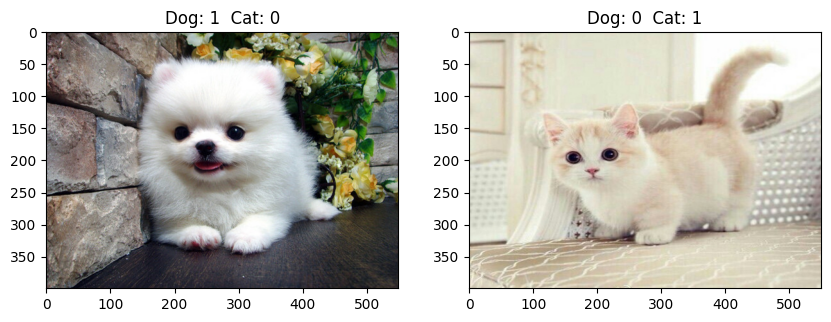

In [ ]:
# 원래 이미지
show_images([img1, img2],[img1_y, img2_y])

**회전 (Rotation)**

=== Tensorflow (Keras) ===



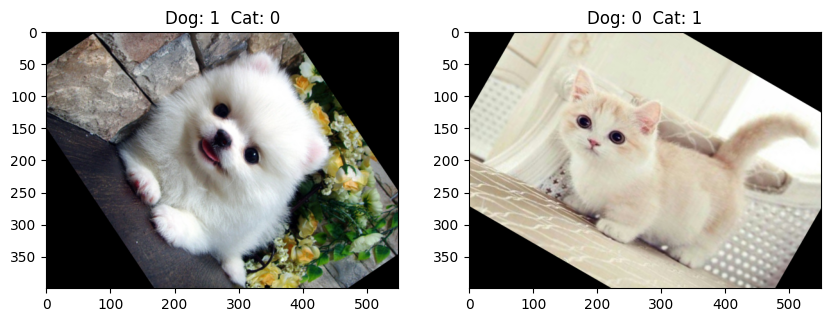


=== Pytorch ===



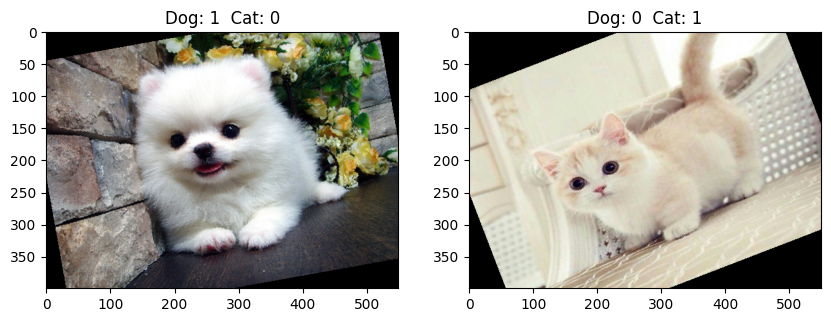

In [ ]:
# 이미지를 회전시켜 새로운 이미지 생성
print("=== Tensorflow (Keras) ===\n")
tf_transform = layers.RandomRotation([-1/6,1/6], fill_mode="constant")    # [-1/6,1/6]: (-1/6)*2pi~(1/6)*2pi 범위내에서 회전
img1_tf = tf_transform(np.asarray(img1), training=True) / 255
img2_tf = tf_transform(np.asarray(img2), training=True) / 255
show_images([img1_tf, img2_tf],[img1_y, img2_y])

print("\n=== Pytorch ===\n")
th_transform = transforms.RandomRotation((-30,30))      # (-30,30): -30도~30도 범위내에서 회전
img1_th = th_transform(img1)
img2_th = th_transform(img2)
show_images([img1_th, img2_th],[img1_y, img2_y])

**밝기 (Brightness)**

=== Tensorflow (Keras) ===



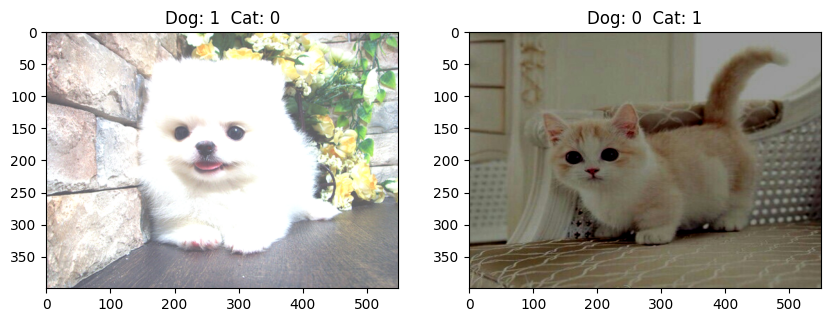


=== Pytorch ===



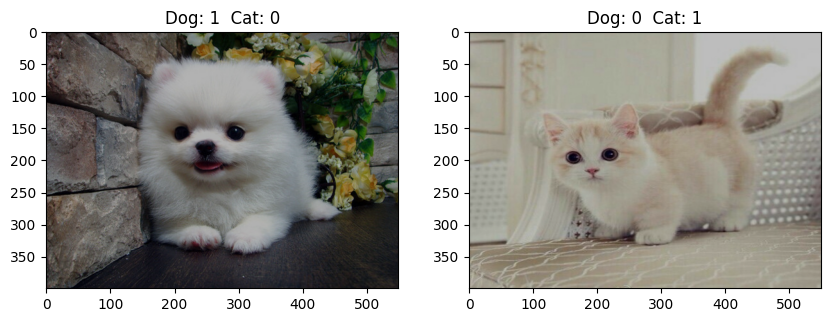

In [ ]:
# 이미지의 밝기를 변화시켜 새로운 이미지 생성
print("=== Tensorflow (Keras) ===\n")
tf_transform = layers.RandomBrightness([-0.5,0.5])     # [-0.5,0.5]: 밝기 변화의 하한값과 상한값, 최대로 [-1,1]까지 가능
img1_tf = tf_transform(np.asarray(img1), training=True) / 255
img2_tf = tf_transform(np.asarray(img2), training=True) / 255
show_images([img1_tf, img2_tf],[img1_y, img2_y])

print("\n=== Pytorch ===\n")
th_transform = transforms.ColorJitter(brightness=[0.3,1])   # [0.3,1]: 밝기 변화 정도 값의 범위, 양수만 가능
img1_th = th_transform(img1)
img2_th = th_transform(img2)
show_images([img1_th, img2_th],[img1_y, img2_y])

**Mixup**

- 2개의 데이터를 선형 조합하여 새로운 데이터를 만드는 방법
- 데이터의 레이블도 같은 비율로 선형 조합

- $ \tilde{x} = \lambda*x_i \; + \; (1-\lambda)*x_j $
<br /> $ \tilde{y} = \lambda*y_i \; + \; (1-\lambda)*y_j $
    - $ x_i, x_j$: 데이터 $ \quad y_i, y_j$: 원핫 인코딩 레이블

In [ ]:
def mixup(x1, x2, y1, y2, lam):

  mix_x = lam*x1 + (1-lam)*x2
  mix_y = lam*y1 + (1-lam)*y2

  return mix_x, mix_y

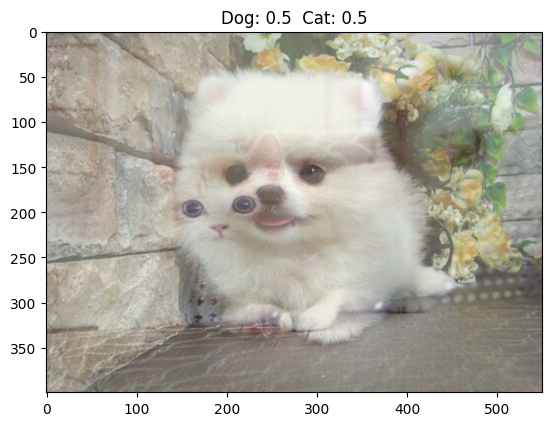

In [ ]:
# 두 이미지를 mixup하여 새로운 이미지 생성
mix_img, mix_y = mixup(np.asarray(img1), np.asarray(img2), img1_y, img2_y, 0.5)   # 0.5: lambda

plt.imshow(mix_img/255)         # 데이터 값의 범위를 0~1 사이로 변경
plt.title(f"Dog: {mix_y[0]}  Cat: {mix_y[1]}")
plt.show()

위 방법들 이외에도 다양한 데이터 증강 방법들이 있음